# 라이브러리 로드 및 기본 세팅

In [1]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.2 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, precision_recall_curve

# 데이콘 점수

In [4]:
# 자체 점수 : 
# 제출 점수(제출 날짜) : 

# 설정

In [5]:
# cat
# one_hot_max_size = 2
# random_state : 5(range(10, 60, 10))
# iterations = 1000
# early_stopping_rounds = 50
# 순서형 특성 수치형으로 지정(4개)
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'
# probability_threshold

In [6]:
# 제거된 특성(4개)
# 'id',
# 'contents_open_dt',
# 'person_prefer_f',
# 'person_prefer_g',

# 데이터 불러오기

In [7]:
# train = pd.read_csv('../data/df_train.csv')
# test = pd.read_csv('../data/df_test.csv')
train = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_train.csv')
test = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/df_test.csv')

# 데이터 확인

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 63 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [9]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [11]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250,1146,1128,1021,2010
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250,1610,1606,1605,2016
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169,1812,1811,1810,2020
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169,101,100,99,2006
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169,984,980,954,2009


# 필요 데이터 추출

## 훈련에 의미가 적은 열 제거

In [12]:
# 제거된 특성(7개)
# 'id',
# 'contents_open_dt',
# 'person_prefer_f',
# 'person_prefer_g',

In [13]:
# 삭제할 특성
pop_col = ['id',
'contents_open_dt',
'person_prefer_f',
'person_prefer_g']
len(pop_col)

4

In [14]:
train = train.drop(pop_col, axis=1) 
test = test.drop(pop_col, axis=1)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 59 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   h_m_match_yn            501951 non-null  bool 
 5   h_s_match_yn            501951 non-null  bool 
 6   person_attribute_a      501951 non-null  int64
 7   person_attribute_a_1    501951 non-null  int64
 8   person_attribute_b      501951 non-null  int64
 9   person_prefer_c         501951 non-null  int64
 10  person_prefer_d_1       501951 non-null  int64
 11  person_prefer_d_2       501951 non-null  int64
 12  person_prefer_d_3       501951 non-null  int64
 13  person_prefer_e         501951 non-null  int64
 14  person_prefer_h_1       501951 non-null  int64
 15  

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 58 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            46404 non-null  bool 
 1   d_m_match_yn            46404 non-null  bool 
 2   d_s_match_yn            46404 non-null  bool 
 3   h_l_match_yn            46404 non-null  bool 
 4   h_m_match_yn            46404 non-null  bool 
 5   h_s_match_yn            46404 non-null  bool 
 6   person_attribute_a      46404 non-null  int64
 7   person_attribute_a_1    46404 non-null  int64
 8   person_attribute_b      46404 non-null  int64
 9   person_prefer_c         46404 non-null  int64
 10  person_prefer_d_1       46404 non-null  int64
 11  person_prefer_d_2       46404 non-null  int64
 12  person_prefer_d_3       46404 non-null  int64
 13  person_prefer_e         46404 non-null  int64
 14  person_prefer_h_1       46404 non-null  int64
 15  person_prefer_h_2  

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [17]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train = train.rename(columns={'contents_attribute_j_1':'contents_attribute_j_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_a,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,target,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,1,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,316,3,398,94,368,58,422,94,1607,1606,1605,2016
1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,0,114,109,56,1,175,152,56,1,175,152,56,1,275,274,274,216,417,94,400,94,399,94,417,94,1607,1606,1605,2016
2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,0,464,463,450,377,175,152,56,1,452,451,450,377,92,91,56,1,364,48,528,250,366,48,363,48,1599,1595,1572,2016
3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,0,703,703,690,618,703,703,690,618,703,703,690,618,275,274,274,216,379,71,495,226,315,1,381,71,1607,1606,1605,2016
4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,0,275,274,274,216,369,368,297,216,369,368,297,216,275,274,274,216,483,208,481,208,480,208,381,71,1607,1606,1605,2016


In [18]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test = test.rename(columns={'contents_attribute_j_1':'contents_attribute_j_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_a,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,person_prefer_d_1_n,person_prefer_d_1_s,person_prefer_d_1_m,person_prefer_d_1_l,person_prefer_d_2_n,person_prefer_d_2_s,person_prefer_d_2_m,person_prefer_d_2_l,person_prefer_d_3_n,person_prefer_d_3_s,person_prefer_d_3_m,person_prefer_d_3_l,contents_attribute_d_n,contents_attribute_d_s,contents_attribute_d_m,contents_attribute_d_l,person_prefer_h_1_m,person_prefer_h_1_l,person_prefer_h_2_m,person_prefer_h_2_l,person_prefer_h_3_m,person_prefer_h_3_l,contents_attribute_h_m,contents_attribute_h_l,contents_attribute_l_n,contents_attribute_l_s,contents_attribute_l_m,contents_attribute_l_l
0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,854,853,824,744,847,847,824,744,1227,1227,1227,926,836,831,824,744,528,250,366,48,359,48,528,250,1146,1128,1021,2010
1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,683,677,659,618,1086,1086,1053,926,662,660,659,618,276,274,274,216,523,250,528,250,359,48,528,250,1610,1606,1605,2016
2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,514,509,482,482,784,783,745,744,1227,1227,1227,926,490,490,482,482,453,169,451,169,452,169,453,169,1812,1811,1810,2020
3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,114,109,56,1,175,152,56,1,175,152,56,1,145,123,56,1,453,169,451,169,452,169,453,169,101,100,99,2006
4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,1078,1078,1053,926,1078,1078,1053,926,1056,1054,1053,926,1097,1094,1093,926,454,169,453,169,316,3,453,169,984,980,954,2009


## 카테고리형 특성으로 지정할 특성

In [19]:
# 원본 데이터에서 순서형 특성
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [20]:
# 순서형 특성 수치형으로 지정 : ⭕
# 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [21]:
cat_f = train.columns.tolist()
numeric_cat = ['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']
for col in numeric_cat:
  cat_f.remove(col)
cat_f.remove('target')

In [22]:
# 59 - 5 = 54개
len(cat_f)

54

# train, test 셋 준비

In [23]:
train.shape

(501951, 59)

In [24]:
X = train.drop(['target'], axis=1)
X.shape

(501951, 58)

In [25]:
y = train[['target']]
y.shape

(501951, 1)

# 모델 훈련/예측

In [26]:
score_df = pd.DataFrame(index=['thr_전', 'thr_후'])
pred_proba_df = pd.DataFrame()
thr_df = pd.DataFrame()
imp_df = pd.DataFrame(index=X.columns)

for random_state in tqdm(range(10, 60, 10)):
  temp_score_list =[]
  # 데이터 셋 나누기
  X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=random_state, shuffle=True, stratify=y)
  # 모델 생성
  cat = CatBoostClassifier(random_state=0, task_type='GPU', iterations=1000, early_stopping_rounds=50,
                        cat_features=cat_f, eval_metric='F1', one_hot_max_size=2)
  # 모델 훈련
  cat.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=100)
  
  # 기본 평가
  val_pred = cat.predict(X_val)
  f1_score_raw = f1_score(y_val, val_pred)
  temp_score_list.append(f1_score_raw)

  # precision, recall, threshold 값 계산
  val_pred_proba = cat.predict_proba(X_val)
  precisions, recalls, thresholds = precision_recall_curve(y_val, val_pred_proba[:,1])
  threshold_boundary = thresholds.shape[0]

  # 최고 F1 값을 갖는 threshold 값 구하기
  pre = precisions[:threshold_boundary]
  re = recalls[:threshold_boundary]
  f1 = 2 * pre * re / (pre + re)
  optimal_idx = np.argmax(f1)
  optimal_threshold = thresholds[optimal_idx]
  thr_df[f'{random_state}'] = [optimal_threshold]

  # 구한 threshold값으로 제한해서 예측
  # 1의 예측값만 불러와도 되므로 [:,1]사용
  val_pred_th =  (val_pred_proba[:,1] >= optimal_threshold)
  val_pred_th = val_pred_th.astype(int)

  # threshold로 제한한 예측 평가
  f1_score_mod = f1_score(y_val, val_pred_th)
  temp_score_list.append(f1_score_mod)
  score_df[f'{random_state}'] = temp_score_list

  print("===============================================")
  print(f"random_state : {random_state}")
  print("threshold 적용 전 f1 score :", f1_score_raw)
  print("threshold 적용 후 f1 score :", f1_score_mod)
  print("===============================================")
  print()

  # test 셋 예측
  pred_proba = cat.predict_proba(test)
  pred_proba_df[f'{random_state}'] = pred_proba[:,1]

  # 특성 중요도
  imp_df[f'{random_state}'] = cat.get_feature_importance()

  0%|          | 0/5 [00:00<?, ?it/s]

Learning rate set to 0.043012
0:	learn: 0.6280370	test: 0.6332218	best: 0.6332218 (0)	total: 389ms	remaining: 6m 28s
bestTest = 0.6643203708
bestIteration = 12
Shrink model to first 13 iterations.
random_state : 10
threshold 적용 전 f1 score : 0.6643203707726845
threshold 적용 후 f1 score : 0.6906387678276668



 20%|██        | 1/5 [00:53<03:35, 53.97s/it]

Learning rate set to 0.043012
0:	learn: 0.6273119	test: 0.6321958	best: 0.6321958 (0)	total: 480ms	remaining: 7m 59s
bestTest = 0.6611247824
bestIteration = 24
Shrink model to first 25 iterations.
random_state : 20
threshold 적용 전 f1 score : 0.6611247824260249
threshold 적용 후 f1 score : 0.6962459420537481



 40%|████      | 2/5 [01:51<02:48, 56.23s/it]

Learning rate set to 0.043012
0:	learn: 0.6165670	test: 0.6193457	best: 0.6193457 (0)	total: 475ms	remaining: 7m 54s
bestTest = 0.663286861
bestIteration = 14
Shrink model to first 15 iterations.
random_state : 30
threshold 적용 전 f1 score : 0.6632868610054921
threshold 적용 후 f1 score : 0.6924244192832963



 60%|██████    | 3/5 [02:46<01:51, 55.54s/it]

Learning rate set to 0.043012
0:	learn: 0.6246822	test: 0.6292979	best: 0.6292979 (0)	total: 397ms	remaining: 6m 36s
100:	learn: 0.6485279	test: 0.6612681	best: 0.6635985 (51)	total: 31.2s	remaining: 4m 37s
bestTest = 0.6635984796
bestIteration = 51
Shrink model to first 52 iterations.
random_state : 40
threshold 적용 전 f1 score : 0.6635984796446397
threshold 적용 후 f1 score : 0.6990903654275912



 80%|████████  | 4/5 [03:54<01:00, 60.49s/it]

Learning rate set to 0.043012
0:	learn: 0.6161939	test: 0.6148914	best: 0.6148914 (0)	total: 394ms	remaining: 6m 33s
bestTest = 0.6612590781
bestIteration = 11
Shrink model to first 12 iterations.
random_state : 50
threshold 적용 전 f1 score : 0.6612590781464258
threshold 적용 후 f1 score : 0.6904327936814266



100%|██████████| 5/5 [04:49<00:00, 57.90s/it]


# 특성 중요도

In [27]:
imp_df

,10,20,30,40,50
d_l_match_yn,18.229512,11.957908,16.483349,11.412579,18.818586
d_m_match_yn,4.192984,7.421956,6.065634,6.861708,4.884142
d_s_match_yn,0.000000,0.000000,0.000000,0.376825,0.000000
h_l_match_yn,0.000000,0.256156,0.000000,1.231349,0.000000
h_m_match_yn,0.000000,0.000000,0.000000,0.619256,0.000000
h_s_match_yn,0.000000,0.000000,0.000000,0.587767,0.000000
person_attribute_a,0.000000,0.000000,0.000000,0.000000,0.000000
person_attribute_a_a,0.000000,0.000000,0.000000,0.186602,0.000000
person_attribute_b,0.000000,0.000000,0.000000,0.000000,0.000000
person_prefer_c,0.000000,0.000000,0.000000,0.000000,0.000000


In [28]:
imp_df['mean'] = imp_df.mean(axis=1)
imp_df

,10,20,30,40,50,mean
d_l_match_yn,18.229512,11.957908,16.483349,11.412579,18.818586,15.380387
d_m_match_yn,4.192984,7.421956,6.065634,6.861708,4.884142,5.885285
d_s_match_yn,0.000000,0.000000,0.000000,0.376825,0.000000,0.075365
h_l_match_yn,0.000000,0.256156,0.000000,1.231349,0.000000,0.297501
h_m_match_yn,0.000000,0.000000,0.000000,0.619256,0.000000,0.123851
h_s_match_yn,0.000000,0.000000,0.000000,0.587767,0.000000,0.117553
person_attribute_a,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
person_attribute_a_a,0.000000,0.000000,0.000000,0.186602,0.000000,0.037320
person_attribute_b,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
person_prefer_c,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
import matplotlib.pyplot as plt

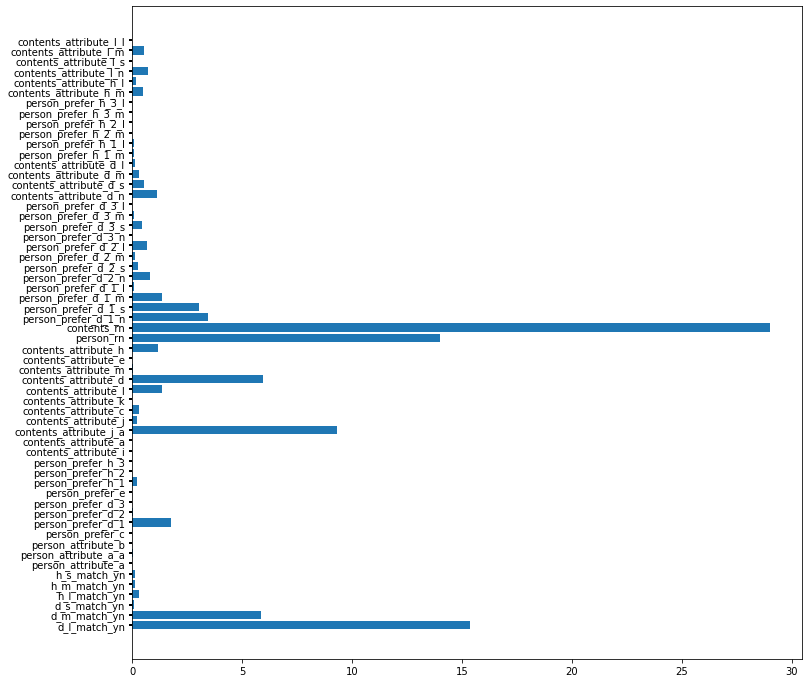

In [30]:
plt.figure(figsize=(12,12))
plt.barh(X.columns, imp_df['mean'])
plt.tick_params(axis='y', width=2)

In [31]:
imp_df['mean'].sort_values()

contents_attribute_l_l     0.000000
contents_attribute_l_s     0.000000
person_prefer_d_3_n        0.000000
contents_attribute_e       0.000000
person_prefer_h_2_m        0.000000
person_prefer_h_2_l        0.000000
contents_attribute_k       0.000000
person_prefer_d_3_l        0.000000
person_prefer_h_3_m        0.000000
contents_attribute_i       0.000000
person_prefer_h_3          0.000000
person_prefer_h_2          0.000000
contents_attribute_a       0.000000
person_prefer_h_3_l        0.000000
person_prefer_c            0.000000
person_attribute_b         0.000000
person_attribute_a         0.000000
person_prefer_d_3          0.006580
person_prefer_e            0.013284
contents_attribute_m       0.019700
person_prefer_d_2          0.032286
person_attribute_a_a       0.037320
person_prefer_d_1_l        0.075225
d_s_match_yn               0.075365
person_prefer_h_1_m        0.101263
person_prefer_h_1_l        0.101460
person_prefer_d_3_m        0.103208
h_s_match_yn               0

In [33]:
imp_df['mean'].describe()

count    58.000000
mean      1.724138
std       4.760699
min       0.000000
25%       0.000000
50%       0.121552
75%       0.723920
max      28.999567
Name: mean, dtype: float64

In [36]:
imp_df['mean'].sort_values()[:-13]

contents_attribute_l_l    0.000000
contents_attribute_l_s    0.000000
person_prefer_d_3_n       0.000000
contents_attribute_e      0.000000
person_prefer_h_2_m       0.000000
person_prefer_h_2_l       0.000000
contents_attribute_k      0.000000
person_prefer_d_3_l       0.000000
person_prefer_h_3_m       0.000000
contents_attribute_i      0.000000
person_prefer_h_3         0.000000
person_prefer_h_2         0.000000
contents_attribute_a      0.000000
person_prefer_h_3_l       0.000000
person_prefer_c           0.000000
person_attribute_b        0.000000
person_attribute_a        0.000000
person_prefer_d_3         0.006580
person_prefer_e           0.013284
contents_attribute_m      0.019700
person_prefer_d_2         0.032286
person_attribute_a_a      0.037320
person_prefer_d_1_l       0.075225
d_s_match_yn              0.075365
person_prefer_h_1_m       0.101263
person_prefer_h_1_l       0.101460
person_prefer_d_3_m       0.103208
h_s_match_yn              0.117553
contents_attribute_d

In [38]:
imp_df['mean'].sort_values()[:-13].index

Index(['contents_attribute_l_l', 'contents_attribute_l_s',
       'person_prefer_d_3_n', 'contents_attribute_e', 'person_prefer_h_2_m',
       'person_prefer_h_2_l', 'contents_attribute_k', 'person_prefer_d_3_l',
       'person_prefer_h_3_m', 'contents_attribute_i', 'person_prefer_h_3',
       'person_prefer_h_2', 'contents_attribute_a', 'person_prefer_h_3_l',
       'person_prefer_c', 'person_attribute_b', 'person_attribute_a',
       'person_prefer_d_3', 'person_prefer_e', 'contents_attribute_m',
       'person_prefer_d_2', 'person_attribute_a_a', 'person_prefer_d_1_l',
       'd_s_match_yn', 'person_prefer_h_1_m', 'person_prefer_h_1_l',
       'person_prefer_d_3_m', 'h_s_match_yn', 'contents_attribute_d_l',
       'h_m_match_yn', 'person_prefer_d_2_m', 'contents_attribute_h_l',
       'person_prefer_h_1', 'contents_attribute_j', 'person_prefer_d_2_s',
       'h_l_match_yn', 'contents_attribute_d_m', 'contents_attribute_c',
       'person_prefer_d_3_s', 'contents_attribute_h_m',
    

## 결과 종합

In [32]:
score_df

,10,20,30,40,50
thr_전,0.664320,0.661125,0.663287,0.663598,0.661259
thr_후,0.690639,0.696246,0.692424,0.699090,0.690433


### 오류난 특성 제거

In [ ]:
# del_col = ['30', '40', '60', '70']
# pred_proba_df = pred_proba_df.drop(del_col, axis=1)
# thr_df = thr_df.drop(del_col, axis=1)
# score_df = score_df.drop(del_col, axis=1)

In [ ]:
pred_proba_df['mean'] = pred_proba_df.mean(axis=1)
thr_df['mean'] = thr_df.mean(axis=1)
score_df['mean'] = score_df.mean(axis=1)

### threshold 값

In [ ]:
thr_df

,10,20,30,40,50,mean
0,0.384397,0.389605,0.374826,0.394066,0.389104,0.3864


## 자체평가

In [ ]:
score_df

,10,20,30,40,50,mean
thr_전,0.680945,0.680916,0.680746,0.681202,0.680278,0.680817
thr_후,0.709445,0.708435,0.708828,0.707440,0.710080,0.708846


## test 예측

In [ ]:
pred = pred_proba_df['mean'].tolist() >= thr_df['mean'].values
pred = pred.astype(int)
pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
np.unique(pred, return_counts=True)

(array([0, 1]), array([10802, 35602]))

# 제출파일 불러오기

In [ ]:
# sub = pd.read_csv('../data/sample_submission.csv')
sub = pd.read_csv('/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/data/sample_submission.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      46404 non-null  int64
 1   target  46404 non-null  int64
dtypes: int64(2)
memory usage: 725.2 KB


# 제출파일 생성

In [ ]:
sub['target'] = pred
sub['target'].value_counts()

1    35602
0    10802
Name: target, dtype: int64

In [ ]:
file_ver = '5.8.1'
# sub.to_csv(f'sub_ver{file_ver}.csv', index=False)
sub.to_csv(f'/content/drive/MyDrive/GitHub/Dacon/TP2(잡케어)/03_모델선정및개선/sub_ver{file_ver}.csv', index=False)

# 코드 마지막